In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import community

In [2]:
edges=pd.read_csv('../csv/edges.csv')
edges[['source','target','weight']].to_csv('../csv/edges_networkx.csv',index=False,header=False)

In [3]:
#G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
g = nx.read_weighted_edgelist("../csv/edges_networkx.csv", delimiter=',', create_using = nx.Graph(), nodetype = int)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 2101
Number of edges: 24339
Average degree:  23.1690


In [4]:
nodes=pd.read_csv('../csv/nodes.csv')
old_nodes_df=nodes[nodes.PY<=2006]
new_nodes=nodes[nodes.PY>2006].index.values
g.remove_nodes_from(new_nodes)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 942
Number of edges: 5959
Average degree:  12.6518


In [5]:
deg = g.degree()
to_remove = [n for n in deg if deg[n] == 1]
g.remove_nodes_from(to_remove)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 931
Number of edges: 5948
Average degree:  12.7777


In [6]:
spring_pos = nx.spring_layout(g)

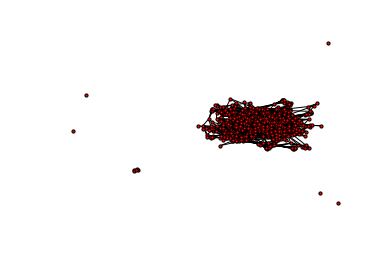

In [7]:
plt.axis("off")
nx.draw_networkx(g, pos = spring_pos, with_labels = False, node_size = 10)


In [106]:
parts = community.best_partition(g)
community.modularity(parts,g)


0.8530528906855585

In [107]:
values = [parts.get(node) for node in g.nodes()]
max(values)

32

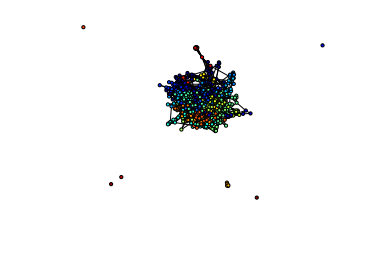

In [108]:
plt.axis("off")
nx.draw_networkx(g, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 10, with_labels = False)


In [109]:
old_nodes_df['cluster']=0

/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [110]:
for x in parts:
    old_nodes_df.set_value(x,'cluster',parts[x])

In [111]:
df=old_nodes_df

In [112]:
dg=df[['id','cluster']].groupby('cluster').count()
dg=dg.reset_index(drop=True)
dg.rename(columns={'id':'cluster size'},inplace=True)

In [113]:
df['cluster size']=df.cluster.apply(lambda x: dg.iloc[x])

/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [114]:
docs=df.label

In [115]:
import re
from nltk import stem
porter = stem.porter.PorterStemmer()
from collections import Counter
docs_cleaned = [[re.sub('[.!,;?()\W\d]+', '', word) for word in doc.lower().split()] for doc in docs]

In [116]:
stop= open ('stopList.txt').read()
stop_list = set(stop.replace("\n", " ").split())
docs_stemed = [[porter.stem(word) for word in document if word not in stop_list] for document in docs_cleaned]

In [117]:
df

,id,label,PY,SO,cluster,cluster size,ind,terms
760,760,"Perceived information quality in data exchanges: Effects on risk, trust, and intention to use",2006,INFORMATION SYSTEMS RESEARCH,0,74,760,"[perceiv, qualiti, data, exchang, risk, trust, intent]"
761,761,Understanding the impact of collaboration software on product design and development,2006,INFORMATION SYSTEMS RESEARCH,1,44,761,"[understand, collabor, softwar, product, design, develop]"
762,762,Formulating the data-flow perspective for business process management,2006,INFORMATION SYSTEMS RESEARCH,2,24,762,"[formul, dataflow, perspect, busi, process, manag]"
763,763,"The nature and role of feedback text comments in online marketplaces: implications for trust building, price premiums, and seller differentiation",2006,INFORMATION SYSTEMS RESEARCH,0,74,763,"[natur, role, feedback, text, comment, onlin, marketplac, trust, build, price, premium, seller, differenti]"
764,764,Individual cognition and dual-task interference in group support systems,2006,INFORMATION SYSTEMS RESEARCH,3,47,764,"[individu, cognit, dualtask, interfer, group, support, system]"
765,765,The influence of recommendations and consumer reviews on evaluations of websites,2006,INFORMATION SYSTEMS RESEARCH,4,1,765,"[recommend, consum, review, evalu, websit]"
766,766,Enabling customer-centricity using wikis and the wiki way,2006,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,5,30,766,"[enabl, customercentr, wiki, wiki]"
767,767,Personalized content recommendation and user satisfaction: Theoretical synthesis and empirical findings,2006,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,6,44,767,"[person, recommend, user, satisfact, theoret, synthesi, empir, find]"
768,768,Online consumer search depth: Theories and new findings,2006,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,5,30,768,"[onlin, consum, search, depth, theori, find]"
769,769,Designing web sites for customer loyalty across business domains: A multilevel analysis,2006,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,5,30,769,"[design, web, site, custom, loyalti, busi, domain, multilevel, analysi]"


In [118]:
df['ind']=df.index
df['terms']= docs_stemed

/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mahdimoqri/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [119]:
dg['keyword']=''
dg['key terms']=''

for mod in dg.index:
    mod_terms=[]
    for terms in df[df.cluster==mod].terms:
        for term in terms:
            mod_terms.append(term)
            
    words = [word for word in mod_terms if word != '']                
    words_counter = Counter(words)
    top_words=[word for word in words_counter.most_common(5) if word[1]>1]
    dg.set_value(mod,'keyword',top_words)
    
    terms = [words[i]+' '+words[i+1] for i in range(len(words)-1)]
    terms_counter= Counter(terms)
    top_terms=[term for term in terms_counter.most_common(5) if term[1]>1]
    dg.set_value(mod,'key terms',top_terms)

In [120]:
dg

,cluster size,keyword,key terms
0,74,"[(trust, 18), (market, 17), (onlin, 13), (price, 13), (electron, 11)]","[(electron market, 4), (onlin marketplac, 3), (trust onlin, 3), (role trust, 2), (erp implement, 2)]"
1,44,"[(learn, 14), (comput, 14), (train, 10), (collabor, 8), (environ, 7)]","[(comput selfefficaci, 4), (collabor learn, 2), (learn comput, 2), (longitudin field, 2), (train method, 2)]"
2,24,"[(busi, 7), (process, 7), (workflow, 6), (reengin, 5), (distribut, 5)]","[(busi process, 5), (workflow manag, 2), (balanc qualiti, 2), (process model, 2)]"
3,47,"[(group, 32), (support, 18), (system, 13), (electron, 10), (decis, 8)]","[(group support, 13), (support system, 12), (electron brainstorm, 7), (decis make, 5), (electron meet, 3)]"
4,1,[],[]
5,30,"[(web, 12), (onlin, 8), (site, 7), (cultur, 5), (model, 5)]","[(web site, 5), (technolog accept, 3), (accept model, 2), (site usabl, 2), (design web, 2)]"
6,44,"[(measur, 19), (user, 16), (satisfact, 13), (servic, 11), (system, 10)]","[(user satisfact, 7), (servic qualiti, 7), (measur system, 5), (system servic, 5), (user particip, 3)]"
7,26,"[(success, 10), (strateg, 9), (plan, 9), (busi, 8), (system, 8)]","[(busi technolog, 5), (system plan, 3), (informationsystem plan, 3), (system success, 3), (align busi, 3)]"
8,47,"[(technolog, 25), (adopt, 14), (standard, 13), (accept, 13), (model, 13)]","[(technolog accept, 8), (belief technolog, 3), (user accept, 3), (technolog usag, 3), (technolog adopt, 3)]"
9,30,"[(team, 14), (virtual, 8), (softwar, 7), (develop, 6), (conflict, 6)]","[(virtual team, 6), (global virtual, 4), (sourc softwar, 3), (open sourc, 3), (develop team, 2)]"


In [ ]:
#dendrogram=community.generate_dendrogram(G_fb)[0]
#dendrogram
com=community.induced_graph(parts,G_fb)
nx.draw_networkx(com,cmap = plt.get_cmap("jet"), node_size = 10, with_labels = False)